# Clonamos el repositorio para obtener los dataSet

In [ ]:
!git clone https://github.com/joanby/machinelearning-az.git

# Damos acceso a nuestro Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Test it

In [ ]:
!ls '/content/drive/My Drive' 

# Google colab tools

In [ ]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive

# Instalar dependendias

In [ ]:
!pip install sklearn

# Random Forest Classification

# Cómo importar las librerías


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importar el data set


In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

# Dividir el data set en conjunto de entrenamiento y conjunto de testing


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Escalado de variables

In [4]:
# Esto no es necesario
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
# Cómo los árboles de decisión no se basan en la distancia (ya sea euclídea, manhattan, etc) no requieren de un reescalado previo. Recordemos que el Random Forest utiliza el algoritmo de Decision Tree, reiteradas en un 'n_estimators' veces para que cada uno prediga y en conjunto se llegue a una predicción por mayoria
# Sin embargo, si queremos ver píxel por píxel fino la representación gráfica, podemos dejar el escalado aunque el algoritmo no lo requiera, para visualizarlo mejor

# Ajustar el clasificador  Random Forest en el Conjunto de Entrenamiento

In [5]:
from sklearn.ensemble import RandomForestClassifier

In [6]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = "entropy", random_state = 0) # n_estimators: número de árboles de dedcisión que formaran parte del bosque(por defecto 10), criterion: gini(indice que mide la dispersión/impureza de los datos) o entropy (mide el 'caos' de los datos, la discrepancia entre ellos, minimizando los datos heterogeneos por sub área), max_features: num máximo de rasgos/columnas sobre los cuales dividir el set, max_depth: profundidad de árboles, para evitar que tengan muchas ramificaciones y se ajusten en demasía a los datos cuando no es requerido, min_samples_leaf: min num de obs para conformar un nodo hoja, min_samples_split: min num de muestras para llevar a cabo la división (split)  
classifier.fit(X_train, y_train)
print(classifier.get_params()) # para ver los parámetros de la regresión hecha
print(classifier.score(X_train,y_train)) # vemos el accuracy de la predicción de la clasificación (con datos de entrenamiento)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
0.98


# Predicción de los resultados con el Conjunto de Testing

In [7]:
y_pred  = classifier.predict(X_test)

# Elaborar una matriz de confusión

In [8]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm
# Vemos que el accuracy del modelo con respecto a los datos de test (sin tomar desbalanceo entre clases) es de 91/100 = 0,91
# En este caso, solo 5 observaciones fueron catalogadas como compras cuando en verdad no lo fueron, y 4 observaciones fueron catalogadas como no compras cuando en verdad lo fueron
# (no compras acertadas:63, compras acertadas:28)
# Sin el reescalado tenemos un 0,92 de precisión 

array([[63,  5],
       [ 4, 28]], dtype=int64)

# Representación gráfica de los resultados del algoritmo en el Conjunto de Entrenamiento

In [11]:
from matplotlib.colors import ListedColormap

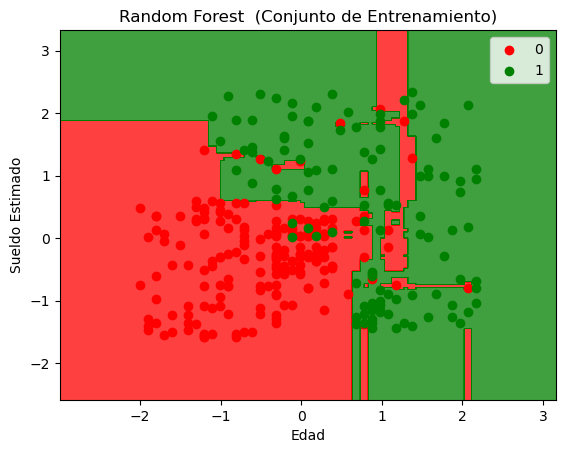

In [12]:
# Vemos el límite de nuestro clasificador (frontera de decisión) con respecto a los datos de train (98% de accuracy antes marcado). Usamos 2 variables indep para visualizar la clasificación en un gráfico 2D (podemos usar 3 para 3D, o reducir dimensiones si tenemos más))
# Crear el grid para el contorno
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01), # el step 0.01 es adecuado para datos reescalados, para datos que no lo están nos conviene poner valores acorde a los observados en el set
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)) # por ej: step=1 en la parte de arriba (x1, años) y step=500 en la parte de abajo (x2, sueldo), sino gastaríamos recursos computacionales pintando miles de puntos que no vamos a llegar a visualizar

# Predecir sobre el grid de puntos y reshape para contorno
Z = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

# Definir la paleta de colores usando códigos RGB 
colors = [(1, 0, 0), (0, 0.5, 0)]  # rojo (no compra) y verde oscuro (compra) [(valor 0 de pred, valor 1 de pred)]
cmap = ListedColormap(colors)

# Graficar el contorno y los puntos de datos
plt.contourf(X1, X2, Z, alpha=0.75, cmap=cmap)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Graficar los puntos de datos con scatter
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=cmap(i), label=j)
plt.title('Random Forest  (Conjunto de Entrenamiento)')
plt.xlabel('Edad')
plt.ylabel('Sueldo Estimado')
plt.legend()
plt.show()

# Si elevamos mucho el número de árboles que conforman el bosque, podremos entrar en Overffiting, intentando captar el modelo esos valores atípicos del entrenamiento como patrones subyacentes trascendentes en la predicción, cuando en verdad no lo son
# Vemos que el gráfico es como un promedio de 10 árboles de decisión que hemos hecho anteriormente, cada uno conformado con k datos diversos del set de entrenamiento, reduciendo un poco el Overffiting que habiamos visto.


# Representación gráfica de los resultados del algoritmo en el Conjunto de Testing

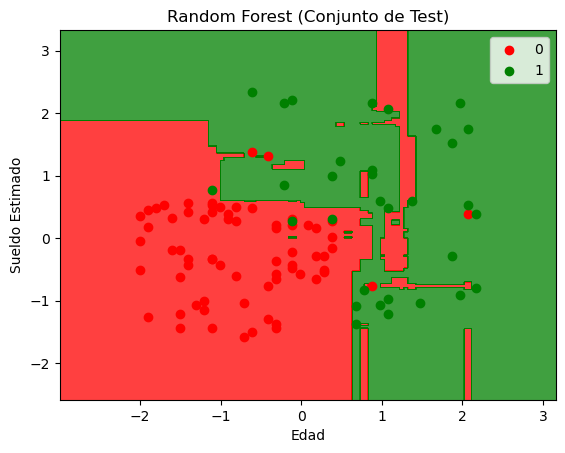

In [15]:
# Vemos el límite de nuestro clasificador (frontera de decisión) con respecto a los datos de test (91% de accuracy antes marcado). Similar análisis que con la matriz de confusión.
# Aplica la misma frontera de decisión conseguida con train a los datos de test. Análisis similar al de la matriz de confusión

# Crear el grid para el contorno
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

# Predecir sobre el grid de puntos y reshape para contorno
Z = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

# Definir la paleta de colores usando códigos RGB 
colors = [(1, 0, 0), (0, 0.5, 0)]  # rojo (no compra) y verde oscuro (compra) [(valor 0 de pred, valor 1 de pred)]
cmap = ListedColormap(colors)

# Graficar el contorno y los puntos de datos
plt.contourf(X1, X2, Z, alpha=0.75, cmap=cmap)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Graficar los puntos de datos con scatter
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=cmap(i), label=j)
plt.title('Random Forest (Conjunto de Test)')
plt.xlabel('Edad')
plt.ylabel('Sueldo Estimado')
plt.legend()
plt.show()

# En general, vemos que los resultados son buenos, pero seguimos visualizando Overffiting en algunas partes del gráfico que se identificaron durante el entrenamiento sin utilidad aparente para predecir 
# (rectángulos/lineas muy pequeñas dentro de predominancias absolutas de otro color significa que el entrenamiento se vió sesgado por un punto concreto del entrenamiento considerado por nosotros como outlier)